In [1]:
import pandas as pd
import numpy as np
from osgeo import gdal
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#definidimos la carpeta en que estan los datos
os.chdir(r"F:\UNAM\Doctorado\SIG\Clima")
path=r"F:\UNAM\Doctorado\SIG\Clima"

In [3]:
#cargamos precipitación 
df=pd.read_csv(path+"/Precipitacion/9048P.txt",sep = ",", engine='python')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.index=df["Fecha"]
df.drop("Fecha",axis=1, inplace=True)

df_Y=df.resample(rule='Y').sum()
df_Y
df_Ym=df_Y['P(mm)'].mean()
df_Ym

#cargamos temperatura
dt=pd.read_csv(path+"/Temperatura/9048T.txt",sep = ",", engine='python')
dt['Fecha'] = pd.to_datetime(dt['Fecha'])
dt.index=dt["Fecha"]
dt.drop("Fecha",axis=1, inplace=True)

dt['Media']=(dt['Tmn(°C)'] + dt['Tmx(°C)'])/2

dt_Y=dt.resample(rule='Y').mean()
dt_Y
dt_Ym=dt_Y['Media'].mean()
dt_Ym

16.560436631482336

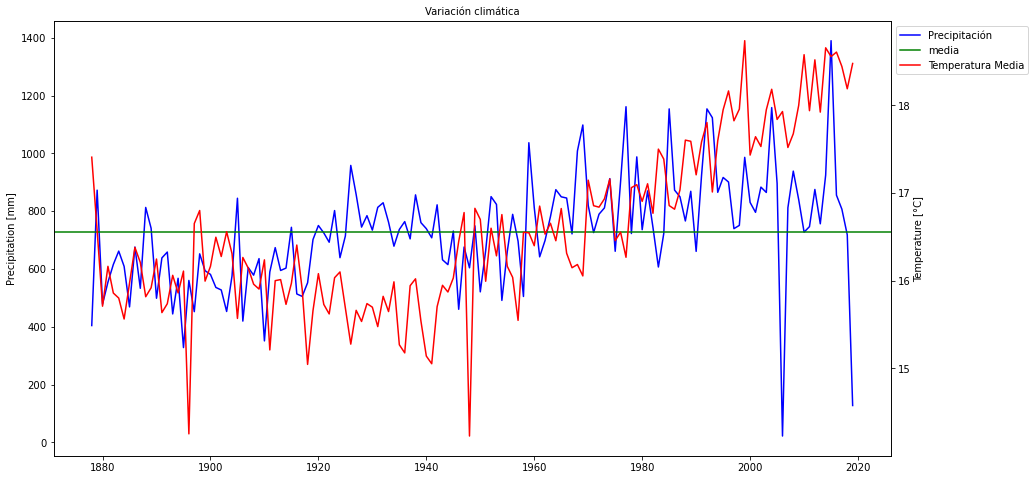

In [4]:
fig=plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();

xticks = pd.to_datetime(df_Y.index.tolist(), format='%B').sort_values() # must work for both axes
lns1=ax1.plot(xticks, df_Y['P(mm)'], color='blue', label='Precipitación')
lns2=ax1.axhline(y=df_Ym, color='g', linestyle='-', label='media')

lns3=ax2.plot(xticks, dt_Y['Media'], color='red', label='Temperatura Media')
#ax2.axhline(y=dt_Ym, color='r', linestyle='-', label='Precipitación media')

#plt.xticks(df_Y.index) # to show all ticks

#ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # must be called after plotting both axes

ax1.set_ylabel('Precipitation [mm]', fontsize=10)
ax2.set_ylabel('Temperature [°C]', fontsize=10)
fig.legend(loc="upper left", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Variación climática', fontsize=10)
plt.savefig("Temperatura.png")

plt.show()